In [9]:
pwd # check your present working directory

u'/home/caveman'

In [10]:
cd /home/caveman/catkin_ws/src/multi_tracker/sample_data/ # navigate to where your sample data is

/home/caveman/catkin_ws/src/multi_tracker/sample_data


In [30]:
import multi_tracker_analysis as mta
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
pd = pandas.read_pickle('trackedobjects.pickle')

In [48]:
# to get information on a function type the following, and info will appear at the bottom of the screen
mta.plot.get_bins_from_backgroundimage?

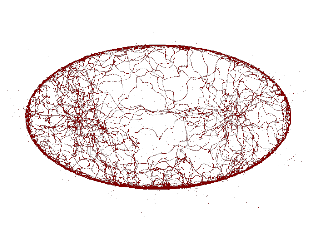

In [18]:
binsx, binsy = mta.plot.get_bins_from_backgroundimage('20151014_145627_N1_deltavideo_bgimg_20151014_1456.png')
mta.plot.plot_trajectories(pd, binsx, binsy)
plt.show()

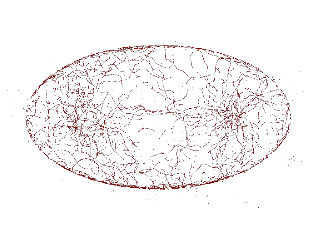

In [22]:
pd_subset = pd.query('speed > 1') # select rows where speed is larger than one, using pandas query function
mta.plot.plot_trajectories(pd_subset, binsx, binsy)
plt.show()

In [43]:
keys, nframes = mta.data_slicing.get_nframes_per_key(pd)
longest_key_index = np.argmax(nframes)
longest_key = keys[longest_key_index]
print longest_key

49359


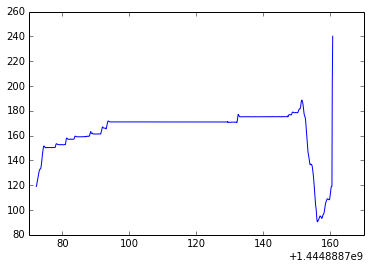

In [46]:
dataset = mta.read_hdf5_file_to_pandas.Dataset(pd)
trajec = dataset.trajec(49359)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(trajec.time_epoch, trajec.position_x)
    

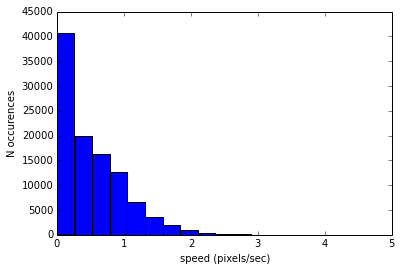

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
bins = np.linspace(0,5,20)
result = ax.hist(pd.speed.values, bins=bins)
ax.set_xlabel('speed (pixels/sec)')
ax.set_ylabel('N occurences')

In [52]:
# calculate frames where flies are in a particular region, save that to the pandas dataset as a new column
pd = mta.data_slicing.calc_frames_with_object_in_circular_region(pd, (495,245), 80, 'region_a')
pd.region_a

864000    0
864000    1
864000    0
864000    0
864000    0
864000    0
864000    0
864000    0
864000    0
864000    0
864001    0
864001    1
864001    0
864001    0
864001    0
864001    0
864001    0
864001    0
864001    0
864001    0
864002    0
864002    1
864002    0
864002    0
864002    0
864002    0
864002    0
864002    0
864002    0
864002    0
         ..
873998    0
873998    0
873998    1
873998    0
873998    0
873998    0
873998    0
873998    0
873998    0
873998    0
873999    0
873999    0
873999    1
873999    0
873999    0
873999    0
873999    0
873999    0
873999    0
873999    0
874000    0
874000    0
874000    1
874000    0
874000    0
874000    0
874000    0
874000    0
874000    0
874000    0
Name: region_a, dtype: float64

In [56]:
pd_a = pd[pd.region_a == 1] # select only the rows of the dataset where the value of region_a is 1
pd_a.region_a

864000    1
864001    1
864002    1
864003    1
864004    1
864005    1
864006    1
864007    1
864008    1
864009    1
864010    1
864011    1
864012    1
864013    1
864014    1
864015    1
864016    1
864277    1
864278    1
864279    1
864280    1
864281    1
864282    1
864283    1
864284    1
864285    1
864286    1
864287    1
864288    1
864289    1
         ..
873975    1
873975    1
873976    1
873976    1
873977    1
873977    1
873978    1
873978    1
873979    1
873980    1
873981    1
873982    1
873983    1
873984    1
873985    1
873986    1
873987    1
873988    1
873989    1
873990    1
873991    1
873992    1
873993    1
873994    1
873995    1
873996    1
873997    1
873998    1
873999    1
874000    1
Name: region_a, dtype: float64

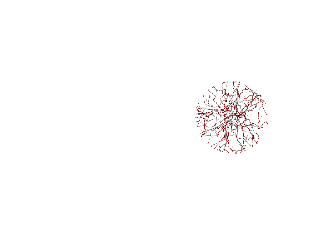

In [55]:
# plot the subset!
mta.plot.plot_trajectories(pd_a, binsx, binsy)
plt.show()